<a href="https://colab.research.google.com/github/zi-onion/ESAA/blob/main/05_27_MeanShift%2C_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 ch7. 3-4 pg. 427-440

---


## 03 평균이동

### 평균이동(Mean Shift)의 개요

**평균이동은 중심을 데이터가 모여있는 밀도가 가장 높은 곳으로 이동시켜 군집화를 수행한다.** (cf.K-평균은 중심에 소속된 데이터의 평균거리 중심으로 이동)

군집 중심점은 데이터의 분포도를 이용해 찾으며, 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것이며 확률밀도 함수를 이용한다. 모델의 확률밀도 찾기 위해서는 **KDE(Kernel Density Estimation)**를 이용한다.

평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트 하여 이동한다. 이를 반복하여 데이터의 군집 중심점을 찾는다.

KDE는 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법이다. 관측된 데이터 각각에 커널 함수를 적용한 값을  모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정한다. 대표적인 커널 함수로서 **가우시안 분포함수**가 사용된다.

KDE는 다음과 같은 커널 함수식으로 표현된다.

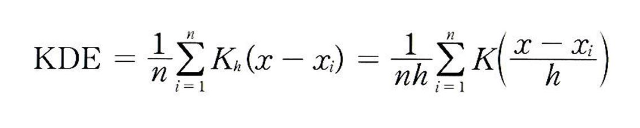





K는 커널함수, x는 확률 변숫값, xi는 관측값, h는 대역폭(bandwidth)이다.


대역폭 h는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smothing)하는데 적용되며, 이 h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있다.
* 작은 h값 -> 좁고 뾰족한 KDE -> 많은 수의 군집 중심점, 과적합(over-fiting)하기 쉽다.
* 매우 큰 h값 -> 과도하게 평활화(smoothing)된 KDE -> 적은 수의 군집 중심점 개수, 과소적합(under-hitting)하기 쉽다
적절한 대역폭 계산이 중요하다.

사이킷런에서 평균 이동 군집화를 위해 MeanShift클래스를 제공한다. 여기에서 가장 중요한 초기화 파라미터는 bandwidth로, KDE의 대역폭 h와 동일한 파라미터이다. 최적의 대역폭 계산을 위해 estimate_bandwidth()함수를 제공한다.

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

지나치게 세분화되어 군집화->대역폭 높여 수정

In [ ]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

In [ ]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X)
print('bandwidth 값: ', round(bandwidth, 3))

In [ ]:
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 게산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift. fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y =centers[label]

  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 표현
  plt. scatter (x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt. scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

Target값과 군집 label값이 1:1로 잘 매칭됐다.

[평균 이동의 장점]
* 데이터 세트의 형태를 특정 형태로 가정하거나 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능하다.
* 이상치의 영향력이 크지 않으며, 미리 군집의 개수를 정할 필요 없다.

[평균 이동의 단점]
* 알고리즘의 수행시간이 오래 걸린다.
* bandWidth의 크기에 따른 군집화 영향도가 매우 크다.

컴퓨터 비전 영역에서 많이 사용된다. 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적
하는데 뛰어난 역할을 수행하는 알고리즘이다.

## 04 GMM(Gaussian Mixture Model)

### GMM(Gaussian Mixture Model) 소개
GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(GaussianDi stribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식이다.

GMM(Gausian Mixture Model)은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주하고, 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출한다. 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM 군집화 방식이다.

GMM에서 모수 추정
• 개별 정규 분포의 평균과 분산
• 각 데이터가 어떤 정규분포에 해당되는지의 확률
-> EM(Expectation and Maximization)방법을 적용

### GMM을 이용한 붓꽃 데이터 세트 군집화

GMM은 확률 기반 군집화이고, K-평균은 거리 기반 군집화이다.

In [ ]:
from sklearn.datasets import load_iris
from sklearn. cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal width', 'petal_length', 'petal width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

GaussianMixture 객체의 가장 중요한 초기화파라미터는 n_components이다.
n_components는 gaussian mixture의 모델의 총 개수로, 군집의 개수를 정하는데 중요한 역할을 수행한다.

In [ ]:
from sklearn.mixture import GaussianMixture

gmm =GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmincluster' 칼럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target값에 따라 gmm_cluster값이 어떻게 매핑됐는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)


Target0은 cluster0으로, Target2는 cluster1로 모두 잘 매핑 됨. Target1만 cluster2로 45개(90%), cluster1로 5개(10%) 매핑 됨.

In [ ]:
## 붓꽃 데이터 세트의 K-평균 군집화를 수행한 결과
kmeans =KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

붓꽃 데이터 세트가 GMM 군집화에 더 효과적이다.

### GMM 과 K-평균의 비교

KMeans는 원형의 범위에서 군집화를 수행하여서 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아진다. 반면, 대표적으로 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못한다.

In [ ]:
## 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

In [ ]:
from sklearn.datasets import make_blobs

# make_blobs()로 30개의 데이터 세트, 3개의 군집 세트, cluster_st=0.5를 만듦.
X, y= make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

In [ ]:
X_aniso = np.dot(X, transformation)
# feature 데이터 세트와 make_blobs()의 y결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data= X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

#생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

In [ ]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
means = KMeans(3, random_state=0)
kmeans_label =kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

KMeans로 군집화를 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성 되지 않음.

In [ ]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label
# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot (gmm, clusterDF, 'gmm_label', iscenter=False)

데이터가 분포된 방향에 따라 정확하게 군집화 됐음.

In [ ]:
print('### KMeans Clustering ###')
print(clusterDF.groupby ('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby ('target')['gmm_label'].value_counts())

KMeans의 경우 군집 1번만 정확히 매핑됐지만, 나머지 군집의 경우 target값과 어긋나는 경우가 발생했다. 하지만 GMM의 경우는 군집이 target값과 잘 매핑되었다.

[GMM 장점]
GMM의 경우는 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다.

[GMM 단점]
군집화를 위한 수행시간이 오래 걸린다.